# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 67558.40 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 98592.13 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 109938.10 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 115621.92 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 115890.58 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 128752.27 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 65831.53 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 92436.21 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 107244.90 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 116430.69 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 128217.95 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 137534.67 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:11, 14.89 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.88 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.70 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.21 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 50.09 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.64 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.42 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.14 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.82 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.14 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.20 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.65 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.82 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.18 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.88 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.37 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.04 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.60 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.80 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.82 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.56 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.90 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 41.78 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.55 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.96 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 48.43 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.88 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.67 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.26 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 34.26 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.71 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.96 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 34.49 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.60 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.09 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 45.68 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.35 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.66 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.56 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.55 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.69 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.82 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.80 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.27 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.79 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.47 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.37 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.39 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 37.01 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.76 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.75 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.04 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.97 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 45.20 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 47.87 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 48.25 examples/s]

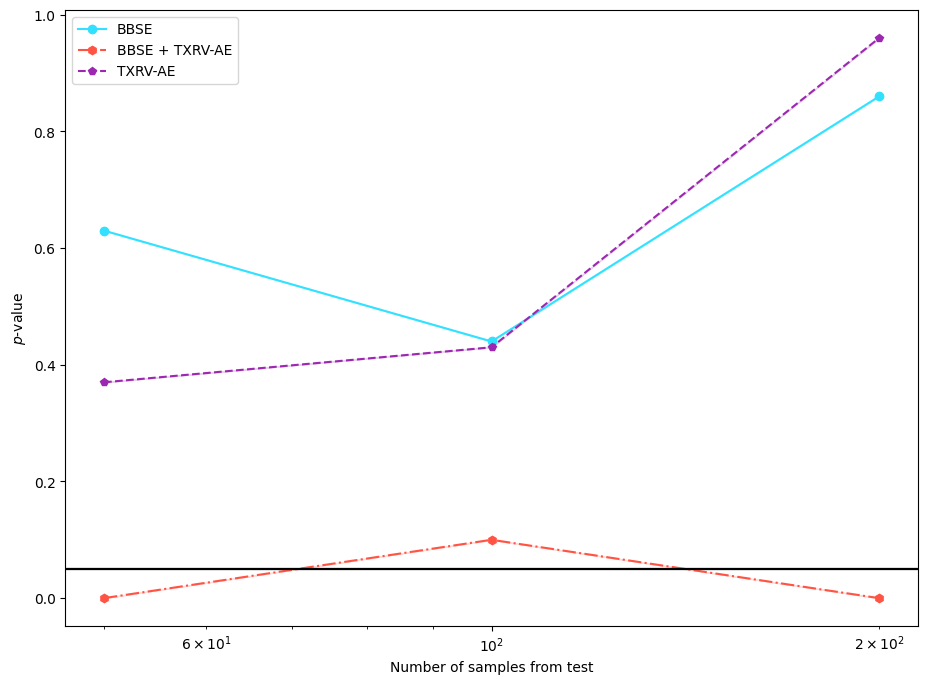

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.59 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.90 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.73 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.61 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.45 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.15 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.23 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.80 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:02<00:04, 14.80 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 26.65 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.41 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.69 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.41 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.00 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 41.23 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.05 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.57 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 48.69 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.26 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.44 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.94 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.64 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.97 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.77 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.62 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.72 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.16 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.65 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.24 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.76 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.09 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.93 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.48 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.86 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.19 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.54 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.82 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.30 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.05 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.33 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.41 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.36 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.51 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.91 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.36 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.21 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.76 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.43 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.33 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.82 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.36 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.40 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.86 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.50 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 48.03 examples/s]

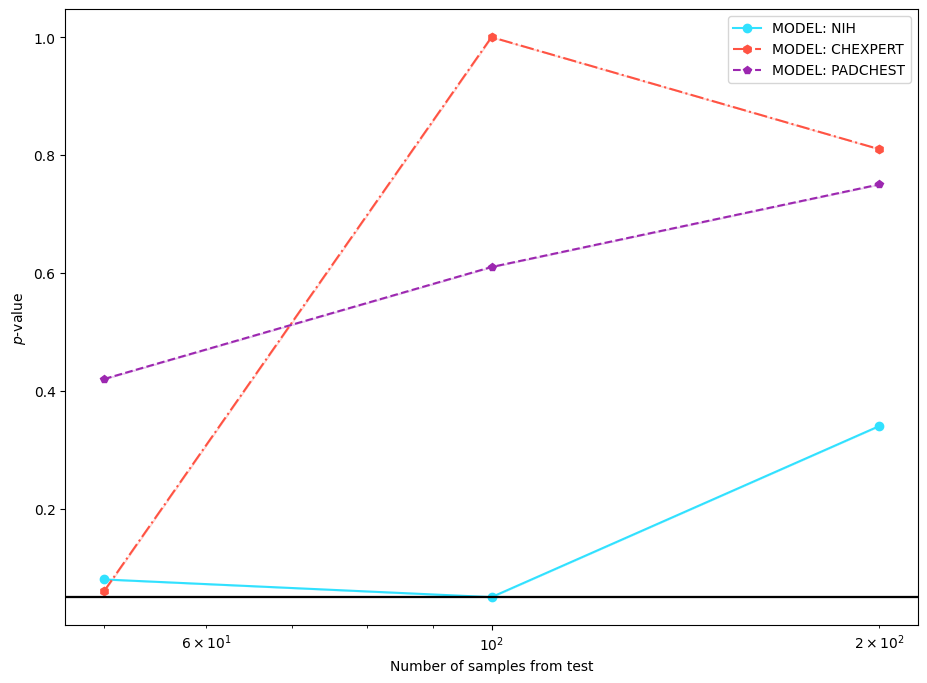

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49345.37 examples/s]

Filter (num_proc=6):  33%|███▎      | 36687/112120 [00:00<00:01, 66102.02 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 78622.71 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 85878.96 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 86719.30 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 92687.88 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:02, 41676.42 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 59174.70 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 72968.82 examples/s]

Filter (num_proc=6):  62%|██████▏   | 69061/112120 [00:01<00:00, 70949.07 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 92672.25 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 98516.78 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.60 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.38 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.80 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.04 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.33 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.99 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.78 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.54 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.22 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.54 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.33 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 37.63 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.45 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.15 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.06 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.88 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.42 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 48.63 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49585.22 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 70625.40 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 81897.90 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89460.43 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 94200.12 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 97959.34 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 48173.74 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 69992.71 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 81421.75 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89525.52 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 93257.58 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 98552.41 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.30 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.12 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.53 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.14 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.78 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.64 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.15 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.50 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.52 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.39 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.00 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.42 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.58 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.12 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.16 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.71 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.82 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.28 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.18 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 46847.56 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 68039.17 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 80189.48 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87612.21 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 92313.88 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 98089.78 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50364.93 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71896.60 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 82943.74 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87739.91 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 92169.29 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 97398.76 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.71 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.90 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.22 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.45 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.58 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.87 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.54 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.49 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.46 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.26 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.03 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.93 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.92 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.64 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.53 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.62 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.52 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.16 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.51 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51008.37 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73247.10 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83537.16 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 90139.91 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 94737.81 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 98558.66 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50136.80 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 68520.57 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 77196.30 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89188.80 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 93901.19 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 98921.37 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.12 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.58 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.37 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.52 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.57 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.25 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.58 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.20 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.99 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.71 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.55 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.64 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.10 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.36 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.69 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 47.46 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 47.31 examples/s]

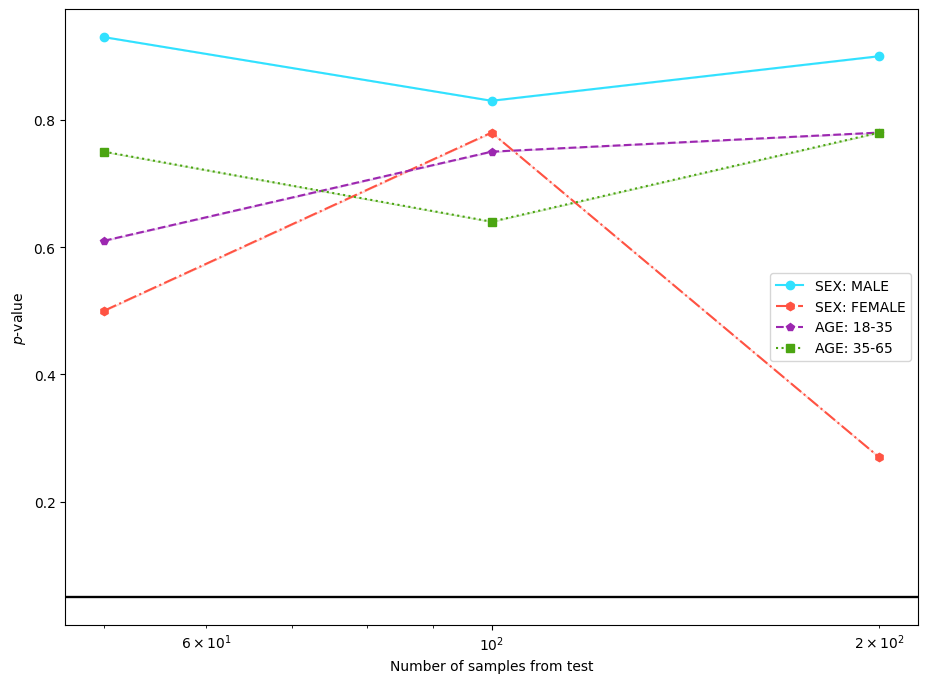

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.73 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.06 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.63 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.68 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.57 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.73 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.62 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.79 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.96 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.55 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.60 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.18 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.83 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.09 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.54 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.02 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.07 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.89 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.14 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.71 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.14 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.59 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.44 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.48 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.62 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.82 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.88 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.54 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.64 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.40 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.62 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.66 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.67 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.60 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.66 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.94 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.21 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.67 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.76 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.70 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.78 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.22 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.02 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.66 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.55 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.46 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.96 examples/s]

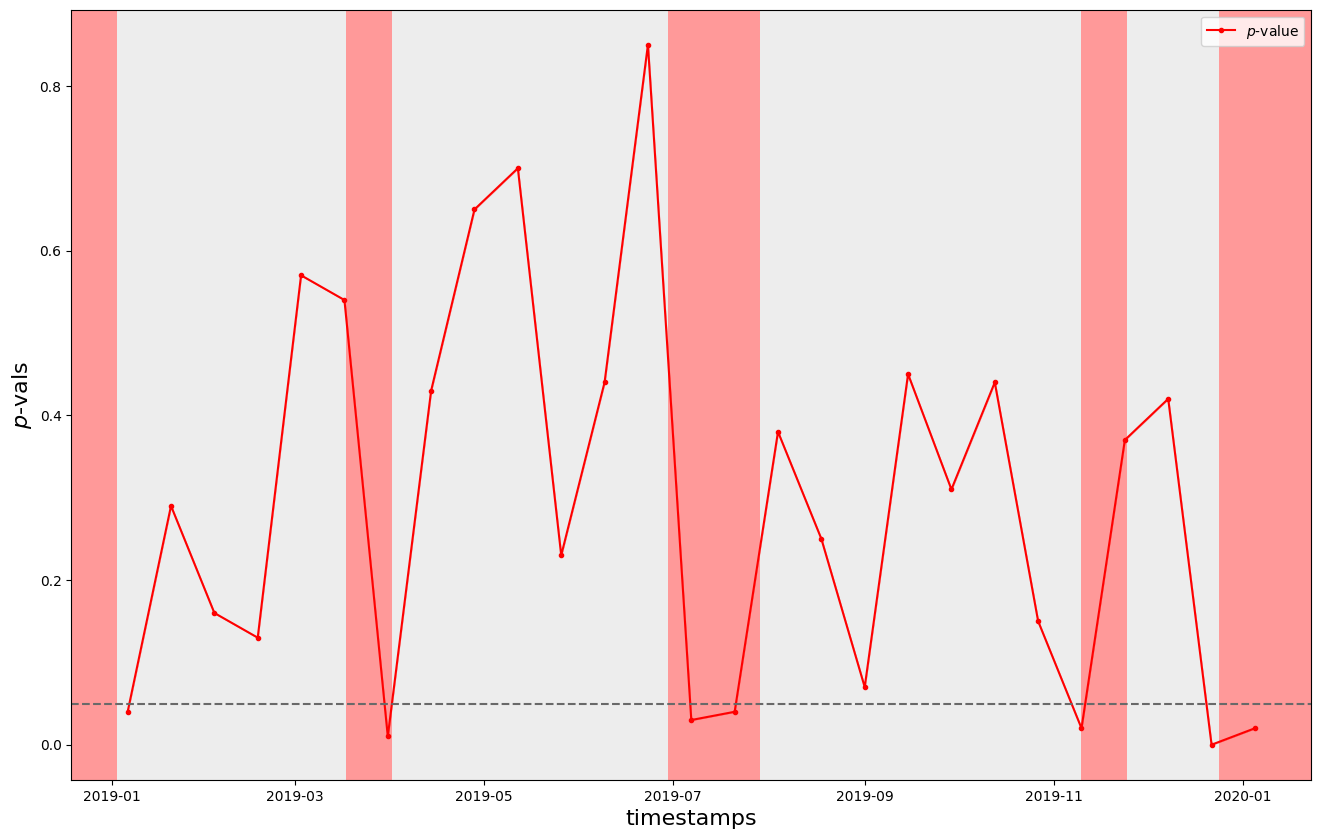

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)